In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data=pd.read_csv('Admission_predict.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
Serial No.           400 non-null int64
GRE Score            400 non-null int64
TOEFL Score          400 non-null int64
University Rating    400 non-null int64
SOP                  400 non-null float64
LOR                  400 non-null float64
CGPA                 400 non-null float64
Research             400 non-null int64
Chance of Admit      400 non-null float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [4]:
data.drop(['Serial No.'],axis=1,inplace=True)

In [5]:
data.head()

GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research  \
0        337          118                  4  4.5   4.5  9.65         1   
1        324          107                  4  4.0   4.5  8.87         1   
2        316          104                  3  3.0   3.5  8.00         1   
3        322          110                  3  3.5   2.5  8.67         1   
4        314          103                  2  2.0   3.0  8.21         0   

   Chance of Admit   
0              0.92  
1              0.76  
2              0.72  
3              0.80  
4              0.65

In [6]:
data.describe()

GRE Score  TOEFL Score  University Rating         SOP        LOR   \
count  400.000000   400.000000         400.000000  400.000000  400.000000   
mean   316.807500   107.410000           3.087500    3.400000    3.452500   
std     11.473646     6.069514           1.143728    1.006869    0.898478   
min    290.000000    92.000000           1.000000    1.000000    1.000000   
25%    308.000000   103.000000           2.000000    2.500000    3.000000   
50%    317.000000   107.000000           3.000000    3.500000    3.500000   
75%    325.000000   112.000000           4.000000    4.000000    4.000000   
max    340.000000   120.000000           5.000000    5.000000    5.000000   

             CGPA    Research  Chance of Admit   
count  400.000000  400.000000        400.000000  
mean     8.598925    0.547500          0.724350  
std      0.596317    0.498362          0.142609  
min      6.800000    0.000000          0.340000  
25%      8.170000    0.000000          0.640000  
50%      8.610000    1.000000          0.730000  
75%      9.062500    1.000000          0.830000  
max      9.920000    1.000000          0.970000

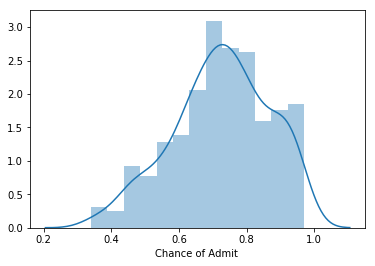

In [7]:
sns.distplot(data['Chance of Admit '])

In [8]:
data['Chance of Admit '].skew()

-0.35344809993278281

In [9]:
data.corr()['Chance of Admit '].sort_values(ascending=False)

Chance of Admit      1.000000
CGPA                 0.873289
GRE Score            0.802610
TOEFL Score          0.791594
University Rating    0.711250
SOP                  0.675732
LOR                  0.669889
Research             0.553202
Name: Chance of Admit , dtype: float64

Text(0,0.5,'Chance of Admit ')

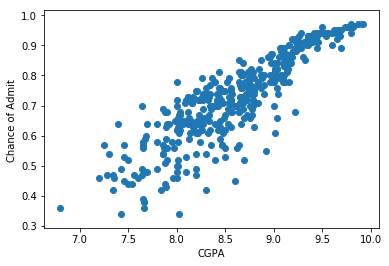

In [10]:
plt.scatter(data['CGPA'],data['Chance of Admit '])
plt.xlabel('CGPA')
plt.ylabel('Chance of Admit ')

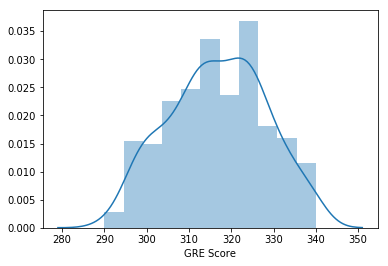

In [11]:
sns.distplot(data['GRE Score'])

Text(0,0.5,'Chance of Admit ')

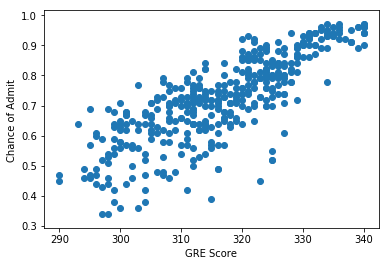

In [12]:
plt.scatter(data['GRE Score'],data['Chance of Admit '])
plt.xlabel('GRE Score')
plt.ylabel('Chance of Admit ')

Text(0,0.5,'Chance of Admit ')

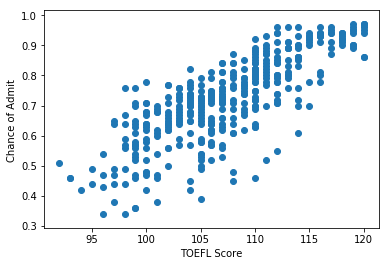

In [13]:
plt.scatter(data['TOEFL Score'],data['Chance of Admit '])
plt.xlabel('TOEFL Score')
plt.ylabel('Chance of Admit ')

In [14]:
data['University Rating'].unique()

array([4, 3, 2, 5, 1], dtype=int64)

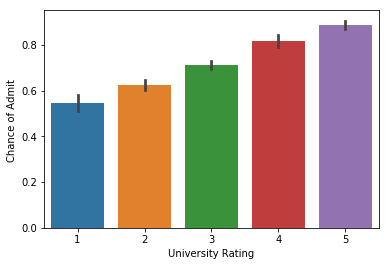

In [15]:
sns.barplot(x='University Rating',y='Chance of Admit ',data=data)

In [16]:
data['SOP'].unique()

array([ 4.5,  4. ,  3. ,  3.5,  2. ,  5. ,  1.5,  1. ,  2.5])

Text(0,0.5,'Chance of Admit ')

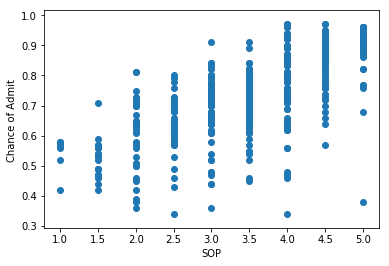

In [17]:
plt.scatter(data['SOP'],data['Chance of Admit '])
plt.xlabel('SOP')
plt.ylabel('Chance of Admit ')

In [18]:
data1=np.array(data)[:,:7]
y=np.array(data['Chance of Admit '])
print(data1)
data1.shape

[[ 337.    118.      4.   ...,    4.5     9.65    1.  ]
 [ 324.    107.      4.   ...,    4.5     8.87    1.  ]
 [ 316.    104.      3.   ...,    3.5     8.      1.  ]
 ..., 
 [ 330.    116.      4.   ...,    4.5     9.45    1.  ]
 [ 312.    103.      3.   ...,    4.      8.78    0.  ]
 [ 333.    117.      4.   ...,    4.      9.66    1.  ]]


(400, 7)

In [19]:
x0=np.ones((400,1))
x=np.concatenate((x0,data1),axis=1)
print(x.shape)
beta=np.random.rand(1,8)
beta.shape

(400, 8)


(1, 8)

In [20]:
for i in range(100):
    y_pred=np.dot(x,beta.transpose())
    diff=y.reshape(400,1)-y_pred
    derivative=-2*np.dot(diff.transpose(),x)/400
    #print(derivative)
    beta=beta-0.000001*derivative
    cost_fn=np.sum(diff**2)/400
print(beta)
print(cost_fn)

[[ 0.24447907 -0.11018449  0.23778003  0.07235853  0.24467135  0.54072536
   0.78996621  0.18401192]]
2.10468491248


# Using sklearn

In [23]:
from sklearn import datasets,linear_model
from sklearn.metrics import mean_squared_error
lm = linear_model.LinearRegression()
lm.fit(data1[:,1:],y.reshape(400,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [24]:
y_pred = lm.predict(data1[:,1:])
print('Coefficients: \n', lm.coef_)
print('Intercept: \n', lm.intercept_)
print("Mean squared error: %.2f"
      % mean_squared_error(y.reshape(400,1), y_pred))

Coefficients: 
 [[ 0.00435514  0.00639938 -0.00454207  0.02215273  0.13245969  0.03128847]]
Intercept: 
 [-0.98037384]
Mean squared error: 0.00
